<a href="https://colab.research.google.com/github/yhpslayy/PANGYIHE-Portfolio/blob/main/Liver%20Disease%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
#Install Kaggle API
!pip install kaggle

In [ ]:
# Upload Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pangyihe","key":"2b3db9b17102702b4d30736bdf6efef5"}'}

In [ ]:
# Create a Kaggle Folder
!mkdir ~/.kaggle

In [ ]:
# Copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List all datasets in Kaggle
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          21917        454  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned         Students Performance | Clean Dataset            10KB  2024-10-29 19:32:26           2369         49  1.0              
valakhorasani/gym-members-exercise-dataset                       Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38          12464        185  1.0              
whisperingkahuna/premier-league-2324-team-and-player-insights    Premier League 

In [ ]:
# Choose datasets in Kaggle
!kaggle datasets download -d rabieelkharoua/predict-liver-disease-1700-records-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/69.6k [00:00<?, ?B/s]
100% 69.6k/69.6k [00:00<00:00, 58.8MB/s]


In [ ]:
# Unzip datasets file
!unzip predict-liver-disease-1700-records-dataset.zip

Archive:  predict-liver-disease-1700-records-dataset.zip
  inflating: Liver_disease_data.csv  


In [ ]:
#Loading Dataset
data = pd.read_csv("Liver_disease_data.csv")

In [ ]:
# Display first few rows
print(data.head())

   Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.087815        0            1   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  Diagnosis  
0          0.658940         0             0          42.734240          1  
1          1.670557         1             0          67.309822          1  
2          9.928308         0             0          63.738956          0  
3          5.630129         0             0          64.555873          1  
4          3.566218         1             0          77.868689          1  


In [ ]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB
None
               Age       Gender          BMI  AlcoholConsumption      Smoking  \
count  1700.000000  1700.000000  1700.000000         1700.000000  1700.000000   
mean     50.394118     0.504118    27

In [ ]:
# Checking for missing values
print(data.isnull().sum())

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


In [ ]:
# Drop rows with any missing values
data_cleaned = data.dropna()

In [ ]:
# Verify the number of rows before and after dropping
print(f"Number of rows before dropping missing values: {data.shape[0]}")
print(f"Number of rows after dropping missing values: {data_cleaned.shape[0]}")

Number of rows before dropping missing values: 1700
Number of rows after dropping missing values: 1700


In [ ]:
# Define the feature columns and the target column
feature_columns = [
    'Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking',
    'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension',
    'LiverFunctionTest'
]
target_column = 'Diagnosis'

In [ ]:
# Extract features and target
X = data_cleaned[feature_columns].values
y = data_cleaned[target_column].values

In [ ]:
# Print the extracted features and target
print("Features (X):")
print(X)
print("Target (y):")
print(y)

Features (X):
[[58.          0.         35.85758415 ...  0.          0.
  42.73424003]
 [71.          1.         30.73247015 ...  1.          0.
  67.3098216 ]
 [48.          0.         19.97140694 ...  0.          0.
  63.73895584]
 ...
 [38.          0.         38.73001733 ...  0.          1.
  56.05336965]
 [67.          0.         35.82079755 ...  0.          0.
  26.30087464]
 [80.          0.         24.06078307 ...  0.          1.
  73.57289293]]
Target (y):
[1 1 0 ... 1 1 1]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Print the standardized data
print("Standardized Training Features:")
print(X_train)
print("Standardized Testing Features:")
print(X_test)

Standardized Training Features:
[[-0.32476245 -0.97817919 -0.60550947 ... -0.4152274  -0.4297313
  -0.93442454]
 [-1.22787184 -0.97817919 -1.15686458 ... -0.4152274   2.32703553
   0.48948541]
 [-1.00209449  1.02230758 -0.44021098 ... -0.4152274  -0.4297313
   0.60083645]
 ...
 [ 0.40901393 -0.97817919  1.50140388 ...  2.40831892 -0.4297313
  -1.52373881]
 [-1.56653786  1.02230758 -0.33475    ... -0.4152274  -0.4297313
  -0.04627297]
 [-0.77631715 -0.97817919 -0.87511408 ...  2.40831892 -0.4297313
   1.5344775 ]]
Standardized Testing Features:
[[ 0.86056862  1.02230758  0.85327071 ... -0.4152274  -0.4297313
   0.66607092]
 [-0.32476245 -0.97817919 -1.3862749  ... -0.4152274  -0.4297313
  -1.64994254]
 [ 1.08634597 -0.97817919  0.81205408 ... -0.4152274  -0.4297313
   1.50999726]
 ...
 [-0.49409546 -0.97817919  1.70638597 ... -0.4152274  -0.4297313
  -0.05580471]
 [ 1.25567898 -0.97817919  0.11809373 ... -0.4152274  -0.4297313
   1.00338986]
 [-0.43765113 -0.97817919  0.79604443 ... -0.

In [ ]:
# Define hyperparameter sets
hyperparams_1 = {'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32}
hyperparams_2 = {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 64}

In [ ]:
# Function to build and train the model
def build_and_train_model(hyperparams, X_train, y_train, X_test, y_test):
    # Initialize ANN
    ann = Sequential()
    ann.add(Dense(units=6, activation="relu", input_dim=X_train.shape[1]))
    ann.add(Dense(units=6, activation="relu"))
    ann.add(Dense(units=1, activation="sigmoid"))

    # Compile the ANN
    optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparams['learning_rate'])
    ann.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

    # Train the model with progress bar
    history = ann.fit(X_train, y_train, epochs=hyperparams['epochs'], batch_size=hyperparams['batch_size'], validation_data=(X_test, y_test), verbose=1)

    # Extract training and validation metrics from history
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    return history, train_accuracy, val_accuracy, train_loss, val_loss

In [ ]:
# Train and evaluate the model with hyperparameters set 1
history_1, train_mse_1, test_mse_1, train_accuracy_1, test_accuracy_1 = build_and_train_model(hyperparams_1, X_train, y_train, X_test, y_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6639 - loss: 0.6366 - val_accuracy: 0.7441 - val_loss: 0.4725
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4394 - val_accuracy: 0.8000 - val_loss: 0.4375
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4305 - val_accuracy: 0.8265 - val_loss: 0.3973
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8129 - loss: 0.3966 - val_accuracy: 0.8235 - val_loss: 0.3942
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.3862 - val_accuracy: 0.8235 - val_loss: 0.3937
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8192 - loss: 0.4034 - val_accuracy: 0.8265 - val_loss: 0.3893
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.3807 - val_accuracy: 0.8353 - val_loss: 0.3811
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.3862 - val_accuracy: 0.8265 - val_loss: 0.3912
Ep

In [ ]:
# Train and evaluate the model with hyperparameters set 2
history_2, train_mse_2, test_mse_2, train_accuracy_2, test_accuracy_2 = build_and_train_model(hyperparams_2, X_train, y_train, X_test, y_test)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6240 - loss: 0.6874 - val_accuracy: 0.6176 - val_loss: 0.6790
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6497 - loss: 0.6697 - val_accuracy: 0.6412 - val_loss: 0.6610
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 0.6487 - val_accuracy: 0.6471 - val_loss: 0.6411
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.6294 - val_accuracy: 0.6824 - val_loss: 0.6195
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.6084 - val_accuracy: 0.6971 - val_loss: 0.5959
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7406 - loss: 0.5763 - val_accuracy: 0.7029 - val_loss: 0.5727
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.5536 - val_accuracy: 0.7118 - val_loss: 0.5508
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.5369 - val_accuracy: 0.7176 - 

In [ ]:
# Display the results
print(f"Set 1 - Training MSE: {train_mse_1}, Testing MSE: {test_mse_1}")
print(f"Set 1 - Training Accuracy: {train_accuracy_1}, Testing Accuracy: {test_accuracy_1}")
print(f"Set 2 - Training MSE: {train_mse_2}, Testing MSE: {test_mse_2}")
print(f"Set 2 - Training Accuracy: {train_accuracy_2}, Testing Accuracy: {test_accuracy_2}")


Set 1 - Training MSE: [0.7264705896377563, 0.804411768913269, 0.824999988079071, 0.8294117450714111, 0.8345588445663452, 0.8374999761581421, 0.8389706015586853, 0.8500000238418579, 0.846323549747467, 0.8507353067398071, 0.8514705896377563, 0.8500000238418579, 0.8566176295280457, 0.8551470637321472, 0.8558823466300964, 0.8558823466300964, 0.8566176295280457, 0.8588235378265381, 0.8617647290229797, 0.8683823347091675, 0.8647058606147766, 0.8661764860153198, 0.8632352948188782, 0.8639705777168274, 0.862500011920929, 0.8705882430076599, 0.8698529601097107, 0.8676470518112183, 0.8654412031173706, 0.8727940917015076, 0.8742647171020508, 0.866911768913269, 0.8772059082984924, 0.8808823823928833, 0.875, 0.8639705777168274, 0.8705882430076599, 0.8691176176071167, 0.8852941393852234, 0.8735294342041016, 0.8801470398902893, 0.8786764740943909, 0.875, 0.8808823823928833, 0.883088231086731, 0.8779411911964417, 0.8779411911964417, 0.8772059082984924, 0.8852941393852234, 0.8794117569923401], Testing 

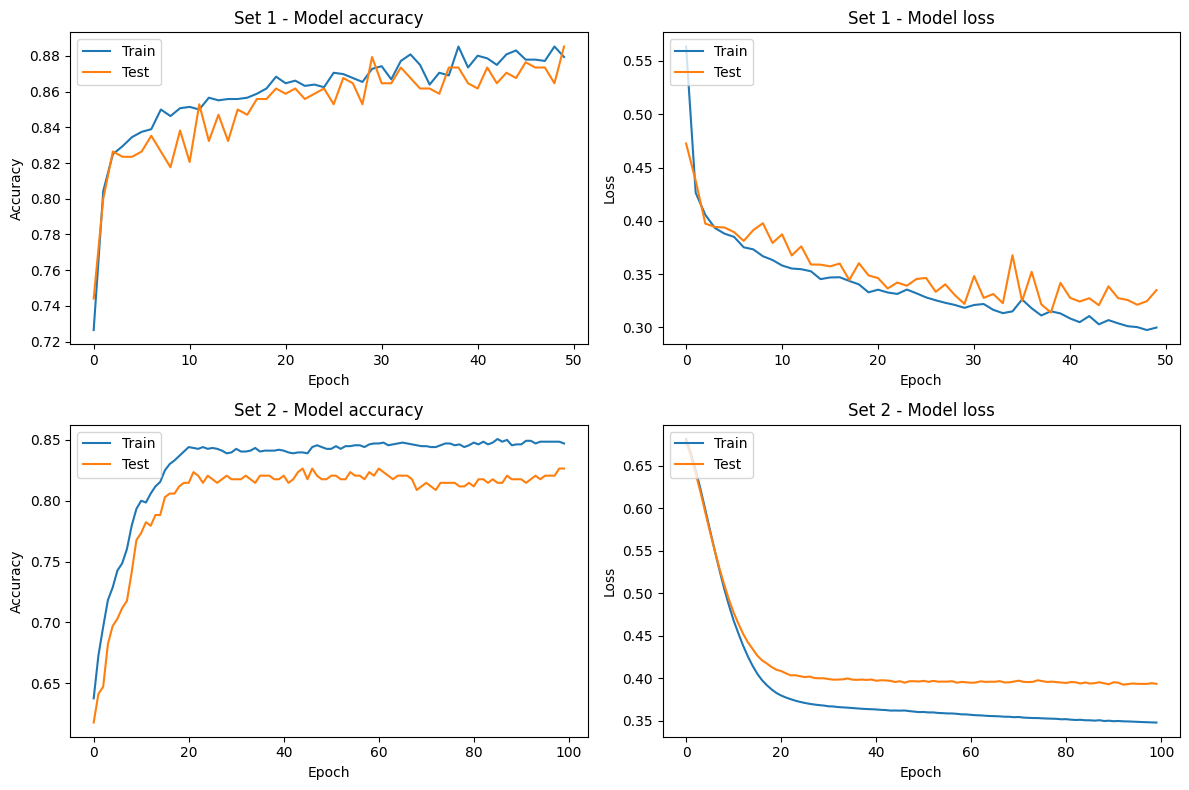

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss values for both sets of hyperparameters
plt.figure(figsize=(12, 8))

# Set 1
plt.subplot(2, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Set 1 - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Set 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Set 2
plt.subplot(2, 2, 3)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Set 2 - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Set 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()